In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('dane_po_EDA.csv')

In [28]:
data.drop([data.columns[0]], axis=1, inplace=True)

In [29]:
df = data.drop(columns=['track', 'album','artist'])

# One hot encoding 

In [30]:
encoded_data = pd.get_dummies(df, columns=['new genre'], drop_first=True, dtype=int)

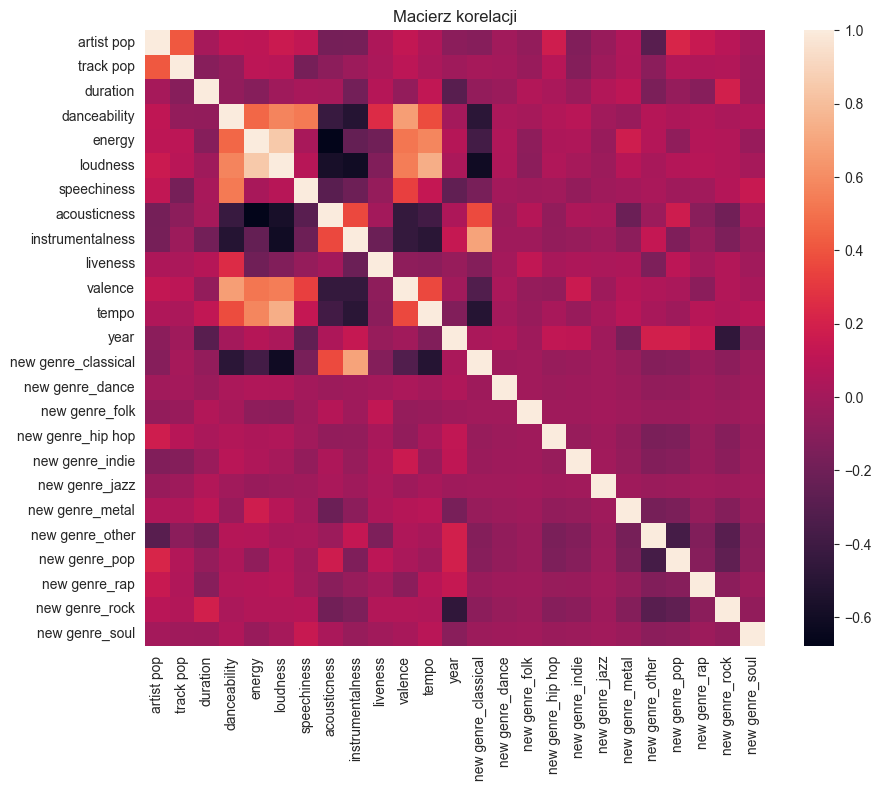

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=False, fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

# Sprawdzenie skorelowanych kolumn 

In [32]:
def cor_features(df):
    highly_correlated_features = set()
    correlation_matrix = df.corr().abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i, j] > 0.6:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                highly_correlated_features.add((colname_i, colname_j, correlation_matrix.iloc[i, j]))
    print("Pairs of highly correlated features:")
    for pair in highly_correlated_features:
        print(pair)

    return encoded_data

In [33]:
cor_features(encoded_data)

Pairs of highly correlated features:
('new genre_classical', 'instrumentalness', 0.6874856465635425)
('valence', 'danceability', 0.6705397233447101)
('instrumentalness', 'loudness', 0.606491070007105)
('new genre_classical', 'loudness', 0.6130698491585062)
('acousticness', 'energy', 0.6786825476639076)
('tempo', 'loudness', 0.731907305653784)
('loudness', 'energy', 0.8484816150788907)


,artist pop,track pop,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,new genre_folk,new genre_hip hop,new genre_indie,new genre_jazz,new genre_metal,new genre_other,new genre_pop,new genre_rap,new genre_rock,new genre_soul
0,87,71,186466,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,...,0,0,0,0,0,0,1,0,0,0
1,80,83,276920,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,...,0,1,0,0,0,0,0,0,0,0
2,82,81,265480,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,...,0,1,0,0,0,0,0,0,0,0
3,86,81,291796,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,...,0,0,0,0,0,0,1,0,0,0
4,81,80,354320,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,68,73,294600,0.459,0.830,-6.254,0.0364,0.000051,0.00014,0.2060,...,0,0,0,0,1,0,0,0,0,0
2233,52,62,236866,0.459,0.830,-6.254,0.0364,0.000051,0.00014,0.2060,...,0,0,0,0,1,0,0,0,0,0
2234,67,52,245306,0.459,0.830,-6.254,0.0364,0.000051,0.00014,0.2060,...,0,0,0,0,0,0,0,0,1,0
2235,77,76,285653,0.459,0.830,-6.254,0.0364,0.000051,0.00014,0.2060,...,0,0,0,0,0,0,0,0,1,0


In [34]:
columns_to_drop = ['tempo', 'acousticness', 'danceability']
encoded_data.drop(columns=columns_to_drop, inplace=True)

In [35]:
target = encoded_data['track pop']
encoded_data.drop(columns='track pop', inplace=True)
encoded_data['target'] = target
encoded_data

,artist pop,duration,energy,loudness,speechiness,instrumentalness,liveness,valence,year,new genre_classical,...,new genre_hip hop,new genre_indie,new genre_jazz,new genre_metal,new genre_other,new genre_pop,new genre_rap,new genre_rock,new genre_soul,target
0,87,186466,0.586,-6.319,0.0362,0.00000,0.0813,0.443,2016,0,...,0,0,0,0,0,1,0,0,0,71
1,80,276920,0.586,-6.319,0.0362,0.00000,0.0813,0.443,2009,0,...,1,0,0,0,0,0,0,0,0,83
2,82,265480,0.586,-6.319,0.0362,0.00000,0.0813,0.443,2019,0,...,1,0,0,0,0,0,0,0,0,81
3,86,291796,0.586,-6.319,0.0362,0.00000,0.0813,0.443,2019,0,...,0,0,0,0,0,1,0,0,0,81
4,81,354320,0.586,-6.319,0.0362,0.00000,0.0813,0.443,1975,0,...,0,0,0,0,0,0,0,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,68,294600,0.830,-6.254,0.0364,0.00014,0.2060,0.431,2001,0,...,0,0,0,1,0,0,0,0,0,73
2233,52,236866,0.830,-6.254,0.0364,0.00014,0.2060,0.431,2000,0,...,0,0,0,1,0,0,0,0,0,62
2234,67,245306,0.830,-6.254,0.0364,0.00014,0.2060,0.431,2005,0,...,0,0,0,0,0,0,0,1,0,52
2235,77,285653,0.830,-6.254,0.0364,0.00014,0.2060,0.431,2004,0,...,0,0,0,0,0,0,0,1,0,76


# Podział danych na treningowe i testowe

In [36]:
from sklearn.model_selection import train_test_split

X = encoded_data.iloc[:, :-1].values
y = encoded_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train[:, :7])
x_test_scaled = scaler.transform(X_test[:, :7])
X_train[:, :7] = x_train_scaled
X_test[:, :7] = x_test_scaled

In [38]:
X_train

array([[-1.08081724, -0.47484211, -0.98382339, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10612292,  0.09883598,  1.00211966, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12350021,  0.06691364,  0.3327833 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.23300284, -0.28357407, -0.2519666 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.64602685, -0.88553424, -2.06984003, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33220676,  0.30865538, -0.14899178, ...,  0.        ,
         1.        ,  0.        ]])

# Modele liniowe 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = [1, 2, 3]
model_pol_1 = make_pipeline(PolynomialFeatures(degree[0]), LinearRegression())
model_pol_2 = make_pipeline(PolynomialFeatures(degree[1]), LinearRegression())
model_pol_3 = make_pipeline(PolynomialFeatures(degree[2]), LinearRegression())

# Random Forest


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300]  # różne wartości liczby drzew
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)

# Najlepszy wynik
print("Najlepszy wynik:", -grid_search.best_score_)

Najlepsze parametry: {'n_estimators': 300}
Najlepszy wynik: 504.81891560562974


In [41]:
model_rf = RandomForestRegressor(n_estimators=300, random_state=42)

# XGBOOST

In [42]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # funkcja straty dla regresji
    'max_depth': 3,                    # maksymalna głębokość drzewa
    'learning_rate': 0.1,              # współczynnik uczenia
}

# MLP

In [47]:
import tensorflow as tf

y_train = y_train.astype(float)
y_test = y_test.astype(float)

model_mlp = tf.keras.Sequential([
    tf.keras.Input(shape=(21,)),  # Warstwa wejściowa
    tf.keras.layers.Dense(64, activation='relu'),  # Warstwa wejściowa
    tf.keras.layers.Dense(32, activation='relu'),  # Ukryta warstwa
    tf.keras.layers.Dense(1, activation='linear')  # Warstwa wyjściowa z liniową funkcją aktywacji
])

model_mlp.compile(optimizer='adam', loss='mean_squared_error')

# Walidacja


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def score_of_model(model):
    mse_score = []

    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(x_train_fold, y_train_fold)

        val_pred = model.predict(x_val_fold)
        mse = mean_squared_error(y_val_fold, val_pred)
        mse_score.append(mse)

    return mse_score

validation_tab = pd.DataFrame(columns=['Model', 'Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5'])
scores = [np.mean(score_of_model(model_pol_1)), np.mean(score_of_model(model_pol_2)), np.mean(score_of_model(model_pol_3)), np.mean(score_of_model(model_rf))]
models= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest']
validation_tab['Mean Score'] = scores
validation_tab['Model'] = models
validation_tab.iloc[0, 1:6] = score_of_model(model_pol_1)
validation_tab.iloc[1, 1:6] = score_of_model(model_pol_2)
validation_tab.iloc[2, 1:6] = score_of_model(model_pol_3)
validation_tab.iloc[3, 1:6] = score_of_model(model_rf)
validation_tab

,Model,Score 1,Score 2,Score 3,Score 4,Score 5,Mean Score
0,linear,625.976866,558.921221,677.310351,573.711889,670.518245,6.212877e+02
1,polynomial (2 degree),582.208288,116903.057461,628.958746,429819.775021,740.079979,1.097348e+05
2,polynomial (3 degree),851196.00178,83843552170.039673,1461550589422.956299,3292814013917415.0,465969559922.731445,6.589651e+14
3,random forest,518.001276,492.792523,579.425319,477.532053,506.572844,5.148648e+02


# Ocena

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_pol_1.fit(X_train, y_train)
model_pol_2.fit(X_train, y_train)
model_pol_3.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb = xgb.train(params, dtrain, num_boost_round=100)
model_mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

y_pred_pol_1 = model_pol_1.predict(X_test)
y_pred_pol_2 = model_pol_2.predict(X_test)
y_pred_pol_3 = model_pol_3.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(dtest)
predictions = model_mlp.predict(X_test)

lista_mse = [mean_squared_error(y_test, y_pred_pol_1), mean_squared_error(y_test, y_pred_pol_2),  mean_squared_error(y_test, y_pred_pol_3), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgb), mean_squared_error(y_test, predictions)]
lista_mae = [mean_absolute_error(y_test, y_pred_pol_1), mean_absolute_error(y_test, y_pred_pol_2),  mean_absolute_error(y_test, y_pred_pol_3), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_xgb), mean_absolute_error(y_test, predictions)]
lista_r = [r2_score(y_test, y_pred_pol_1), r2_score(y_test, y_pred_pol_2),  r2_score(y_test, y_pred_pol_3), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), r2_score(y_test, predictions)]
models= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest', 'XGBOOST', 'MLP']

error_tab  = pd.DataFrame()
error_tab['Model'] = models
error_tab['MSE'] = lista_mse
error_tab['MAE'] = lista_mae
error_tab['R^2'] = lista_r

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8979.0322 - val_loss: 854.3286
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 843.8656 - val_loss: 785.7650
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 786.2825 - val_loss: 771.0832
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 867.3894 - val_loss: 766.8271
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 848.7086 - val_loss: 808.5696
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 834.9874 - val_loss: 756.1023
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 786.7921 - val_loss: 770.5824
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 811.7214 - val_loss: 788.2447
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 780.6782 - val_loss: 748.8550
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 867.1241 - val_loss: 736.7867
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [49]:
error_tab

,Model,MSE,MAE,R^2
0,linear,6.072240e+02,18.618317,3.054486e-01
1,polynomial (2 degree),8.429293e+03,21.905550,-8.641545e+00
2,polynomial (3 degree),1.283954e+11,25081.092852,-1.468605e+08
3,random forest,5.291869e+02,16.262152,3.947086e-01
4,XGBOOST,5.032377e+02,16.561532,4.243895e-01
5,MLP,8.259153e+02,23.933020,5.530639e-02


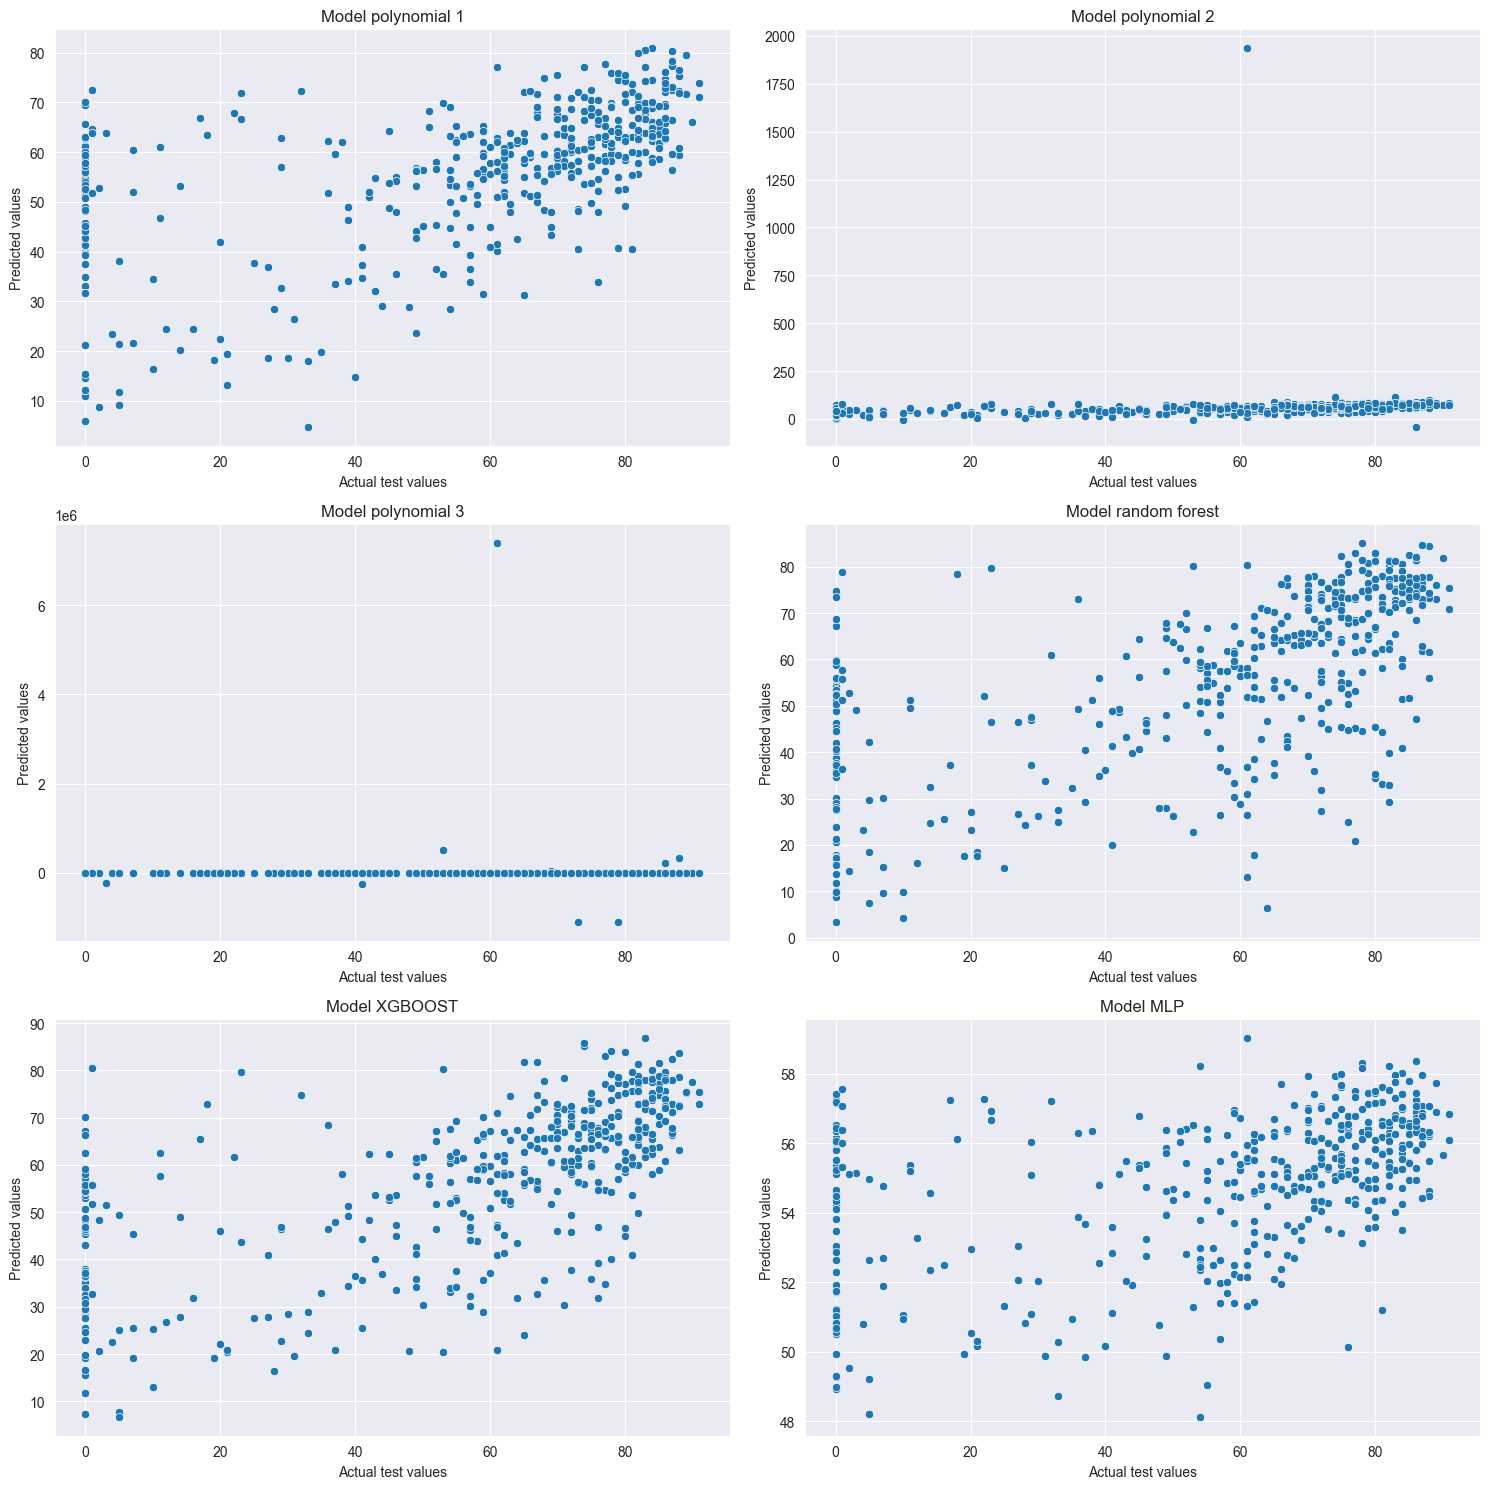

In [50]:
def wykres(y_test, y_pred, model_name, ax):
    sns.scatterplot(x=y_test, y=y_pred, ax=ax)
    ax.set(xlabel='Actual test values', ylabel=f'Predicted values')
    ax.set_title(f'{model_name}')
    
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

wykres(y_test, y_pred_pol_1, 'Model polynomial 1', axes[0, 0])
wykres(y_test, y_pred_pol_2, 'Model polynomial 2', axes[0, 1])
wykres(y_test, y_pred_pol_3, 'Model polynomial 3', axes[1, 0])
wykres(y_test, y_pred_rf, 'Model random forest', axes[1, 1])
wykres(y_test, y_pred_xgb, 'Model XGBOOST', axes[2, 0])
y_pred = predictions.flatten()
wykres(y_test, y_pred, 'Model MLP', axes[2, 1])

plt.tight_layout()
plt.show()

In [ ]:
def tabela(y_pred):
    wyniki = pd.DataFrame()
    wyniki['y_pred'] = y_pred
    wyniki['y_true'] = y_test
    return wyniki

## Wykresy błędów słupkowe

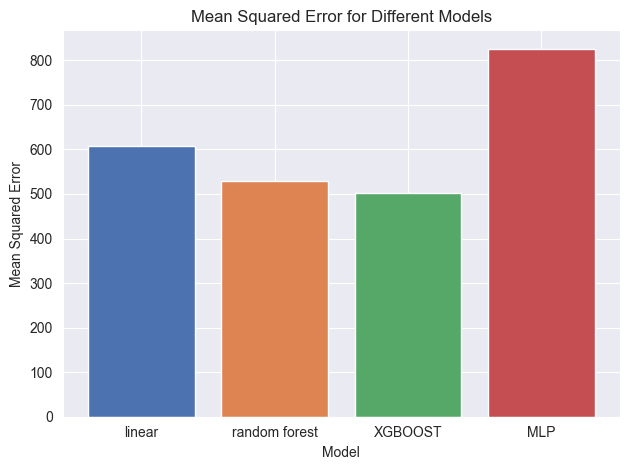

In [51]:
var = error_tab[(error_tab['Model'] != 'polynomial (2 degree)') & (error_tab['Model'] != 'polynomial (3 degree)')]
palette = sns.color_palette("deep", len(var))
plt.bar(var['Model'], var['MSE'], color=palette)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Models')
plt.tight_layout()

array([[-1.75906877, -0.92524115, -0.38068513, ...,  0.        ,
         0.        ,  0.        ],
       [-1.70254781,  0.01015348,  0.87340113, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10612292,  0.59223218,  1.25220138, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.006919  , -0.77856639,  1.27058974, ...,  0.        ,
         0.        ,  0.        ],
       [-0.06343996, -0.57508946, -0.39171815, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.44524868,  1.01450316, -2.06984003, ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
encoded_data.columns

Index(['artist pop', 'duration', 'energy', 'loudness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'year',
       'new genre_classical', 'new genre_dance', 'new genre_folk',
       'new genre_hip hop', 'new genre_indie', 'new genre_jazz',
       'new genre_metal', 'new genre_other', 'new genre_pop', 'new genre_rap',
       'new genre_rock', 'new genre_soul', 'target'],
      dtype='object')

In [58]:
def get_popularity(artist):
    filt = data['artist'] == artist
    return data[filt]['artist pop'].drop_duplicates()


214    93
Name: artist pop, dtype: int64

In [64]:
def predict_pop():
    a = input('Artist:')
    pop = get_popularity(a)
    d = int(input('Duration: '))
    e = int(input('Energy: '))
    l = int(input('Loudness: '))
    s = int(input('Speechiness: '))
    i = int(input('Instrumentalness: '))
    li = int(input('Liveness: '))
    v = int(input('Valence'))
    y = int(input('Year: ' ))
    g = input('Genre (pop, hip hop, classical, dance, folk, soul, rock, metal, rap, jazz,indie, other): ')
    frame = pd.DataFrame({'pop': pop, 'd':d, 'e':e, 'l':l, 's':s, 'i':i, 'li':li, 'v':v, 'y':y, 'g':g})
    encoded_frame = pd.get_dummies(frame, columns=['g'], drop_first=True, dtype=int)

    sc = StandardScaler()
    frame_scaled = sc.fit_transform(encoded_frame[:7])
    
    d = xgb.DMatrix(frame_scaled)
    y_pred_xgb = model_xgb.predict(d)
    
    return y_pred_xgb

,pop,d,e,l,s,i,li,v,y,g
214,93,3244,32,34,23,23,32,23,2020,pop
